In [1]:
import cv2  
import numpy as np  
import types
import matplotlib.pyplot as plt

In [2]:
# converting types to binary  
def msg_to_bin(msg):  
    if type(msg) == str:  
        return ''.join([format(ord(i), "08b") for i in msg])  
    elif type(msg) == bytes or type(msg) == np.ndarray:  
        return [format(i, "08b") for i in msg]  
    elif type(msg) == int or type(msg) == np.uint8:  
        return format(msg, "08b")  
    else:  
        raise TypeError("Input type not supported")  

In [3]:
# defining function to hide the secret message into the image  
def hide_data(img, secret_msg):  
    # calculating the maximum bytes for encoding  
    nBytes = img.shape[0] * img.shape[1] * 3 // 8  
    print("Maximum Bytes for encoding:", nBytes)  
    # checking whether the number of bytes for encoding is less  
    # than the maximum bytes in the image  
    if len(secret_msg) > nBytes:  
        raise ValueError("Error encountered insufficient bytes, need bigger image or less data!!")  
    secret_msg += '#####'       # we can utilize any string as the delimiter  
    dataIndex = 0  
    # converting the input data to binary format using the msg_to_bin() function  
    bin_secret_msg = msg_to_bin(secret_msg)  
  
    # finding the length of data that requires to be hidden  
    dataLen = len(bin_secret_msg)  
    for values in img:  
        for pixels in values:  
            # converting RGB values to binary format  
            r, g, b = msg_to_bin(pixels)  
            # modifying the LSB only if there is data remaining to store  
            if dataIndex < dataLen:  
                # hiding the data into LSB of Red pixel  
                pixels[0] = int(r[:-1] + bin_secret_msg[dataIndex], 2)  
                dataIndex += 1  
            if dataIndex < dataLen:  
                # hiding the data into LSB of Green pixel  
                pixels[1] = int(g[:-1] + bin_secret_msg[dataIndex], 2)  
                dataIndex += 1  
            if dataIndex < dataLen:  
                # hiding the data into LSB of Blue pixel  
                pixels[2] = int(b[:-1] + bin_secret_msg[dataIndex], 2)  
                dataIndex += 1  
            # if data is encoded, break out the loop  
            if dataIndex >= dataLen:  
                break  
      
    return img  

In [4]:
def show_data(img):  
    bin_data = ""  
    for values in img:  
        for pixels in values:  
            # converting the Red, Green, Blue values into binary format  
            r, g, b = msg_to_bin(pixels)  
            # data extraction from the LSB of Red pixel  
            bin_data += r[-1]  
            # data extraction from the LSB of Green pixel  
            bin_data += g[-1]  
            # data extraction from the LSB of Blue pixel  
            bin_data += b[-1]  
    # split by 8-Bits  
    allBytes = [bin_data[i: i + 8] for i in range(0, len(bin_data), 8)]  
    # converting from bits to characters  
    decodedData = ""  
    for bytes in allBytes:  
        decodedData += chr(int(bytes, 2))  
        # checking if we have reached the delimiter which is "#####"  
        if decodedData[-5:] == "#####":
            break  
    # print(decodedData)  
    # removing the delimiter to display the actual hidden message  
    return decodedData[:-5]  
  

In [5]:
# defining function to encode data into Image  
def encodeText():  
    img_name = input("Enter image name (with extension): ")  
    # reading the input image using OpenCV-Python  
    img = cv2.imread(img_name)  
  
    # printing the details of the image  
    print("The shape of the image is: ", img.shape) # checking the image shape to calculate the number of bytes in it  
    print("The original image is as shown below: ")  
    # resizing the image as per the need  
    resizedImg = cv2.resize(img, (500, 500))  
    # displaying the image  
    #cv2.imshow('origimage',resizedImg)
    #window1=cv2.namedWindow("w1")
    #cv2.imshow(window1,img)
    #cv2.waitKey(8000)
    #cv2.destroyWindow(window1)
    plt.imshow(resizedImg)
    plt.title("Actual image")
    plt.show()
  
    data = input("Enter data to be encoded: ")  
    if (len(data) == 0):  
        raise ValueError('Data is Empty')  
      
    file_name = input("Enter the name of the new encoded image (with extension): ")  
    # calling the hide_data() function to hide the secret message into the selected image  
    encodedImage = hide_data(img, data)  
    cv2.imwrite(file_name, encodedImage) 

In [6]:
# defining the function to decode the data in the image  
def decodeText():  
    # reading the image containing the hidden image  
    img_name = input("Enter the name of the Steganographic image that has to be decoded (with extension): ")  
    img = cv2.imread(img_name)  # reading the image using the imread() function  
  
    print("The Steganographic image is as follow: ")  
    resizedImg = cv2.resize(img, (500, 500))    # resizing the actual image as per the needs  
    #cv2.imshow('stegoimage',resizedImg)  # displaying the Steganographic image
    #window2=cv2.namedWindow("w2")
    #cv2.imshow(window2,img)
    #cv2.waitKey(8000)
    #cv2.destroyWindow(window2)
    plt.imshow(resizedImg)
    plt.title("Stego image")
    plt.show()

      
    text = show_data(img)  
    print(text)  

In [7]:
# image steganography  
def steganography():  
    n = int(input("Image Steganography \n1. Encode the data \n2. Decode the data \n Select the option: "))  
    if (n == 1):  
        print("\nEncoding...")  
        encodeText()  
  
    elif (n == 2):  
        print("\nDecoding...")  
        print("Decoded message is ")
        decodeText()
      
    else:  
        raise Exception("Inserted value is incorrect!")  
  


Image Steganography 
1. Encode the data 
2. Decode the data 
 Select the option: 1

Encoding...
Enter image name (with extension): ./pika.png
The shape of the image is:  (500, 500, 3)
The original image is as shown below: 


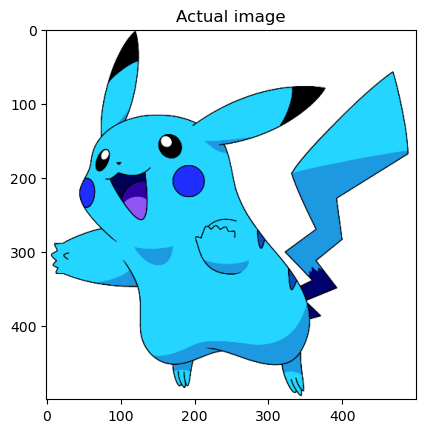

Enter data to be encoded: aashi i love you.
Enter the name of the new encoded image (with extension): ./gg.png
Maximum Bytes for encoding: 93750


In [14]:
steganography() # encoding the image

Image Steganography 
1. Encode the data 
2. Decode the data 
 Select the option: 2

Decoding...
Decoded message is 
Enter the name of the Steganographic image that has to be decoded (with extension): ./gg.png
The Steganographic image is as follow: 


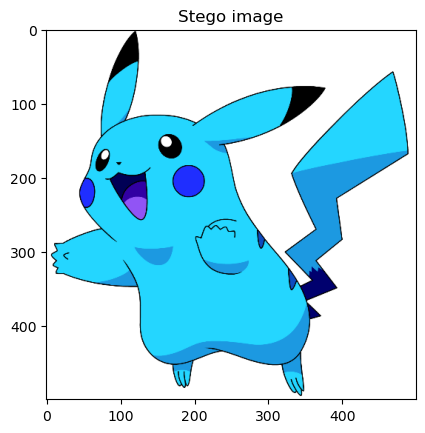

aashi i love you.


In [15]:
steganography()